In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

## Case Study


In [4]:
import dateutil

df_phone = pd.read_csv("input_file/phone_data.csv")
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [5]:
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst = True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [6]:
df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

<AxesSubplot:xlabel='month'>

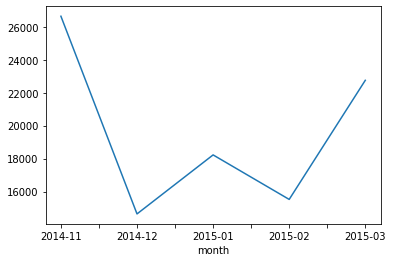

In [7]:
# duration을 month 별로 추출

df_phone.groupby("month")["duration"].sum().plot()

In [8]:
df_phone.groupby("month")["duration"].mean()

month
2014-11    115.823657
2014-12     93.260318
2015-01     88.894141
2015-02    113.301453
2015-03    225.251891
Name: duration, dtype: float64

In [9]:
grouped = df_phone.groupby("month").agg({"duration": [min, max, np.mean]})

grouped.rename(
    columns = {"min": "min_duration", "max": "max_duration", "mean": "mean_duration"}
)

duration                           
        min_duration max_duration mean_duration
month                                          
2014-11          1.0       1940.0    115.823657
2014-12          1.0       2120.0     93.260318
2015-01          1.0       1859.0     88.894141
2015-02          1.0       1863.0    113.301453
2015-03          1.0      10528.0    225.251891

In [10]:
grouped.add_prefix("duration_")

duration_duration                           
             duration_min duration_max duration_mean
month                                               
2014-11               1.0       1940.0    115.823657
2014-12               1.0       2120.0     93.260318
2015-01               1.0       1859.0     88.894141
2015-02               1.0       1863.0    113.301453
2015-03               1.0      10528.0    225.251891

<AxesSubplot:xlabel='month'>

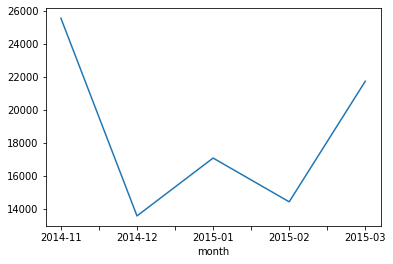

In [11]:
# selection

df_phone[df_phone["item"]=="call"].groupby("month")["duration"].sum().plot()

<AxesSubplot:xlabel='month'>

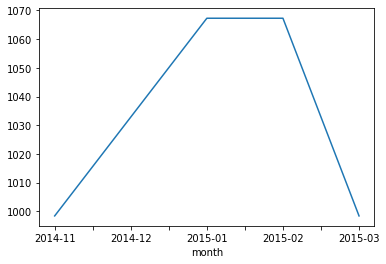

In [12]:
df_phone[df_phone["item"]=="data"].groupby("month")["duration"].sum().plot()

<AxesSubplot:xlabel='month'>

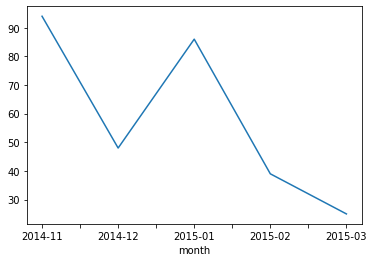

In [13]:
df_phone[df_phone["item"]=="sms"].groupby("month")["duration"].sum().plot()

In [14]:
df_phone.groupby(["month","item"])["duration"].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: duration, dtype: int64

In [15]:
df_phone.groupby(["month","item"])["duration"].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


<AxesSubplot:xlabel='month'>

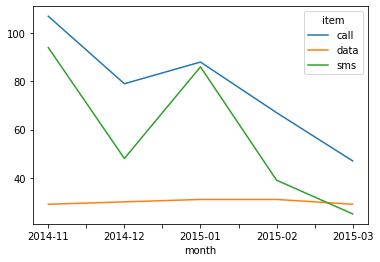

In [16]:
df_phone.groupby(["month","item"])["duration"].count().unstack().plot()

In [17]:
# aggregation

df_phone.groupby("month", as_index=False).agg({"duration":"sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [18]:
df_phone.groupby(["month","item"]).agg(
    {
        "duration": sum,
        "network_type": "count",
        "date": "first"
    }
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00